# CPSC6300-001 Applied Data Science - HW7 ¶



# Part C. Preparing Data for Machine Learning (60 points)

In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns
import math
housing = pd.read_csv("housing.csv")

In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [44]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 1. Creat a Test Dataset (12 points)

a. Use the __train_test_split()__ method in the library __sklearn.model_selection__ to split the __housing__ data into a __train_data__ and __test_data__. Set the test_size to 0.33 and random_state to 25.

In [45]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split( housing, test_size=0.33, random_state=25)
housing_train.to_csv("train.csv")
housing_test.to_csv("test.csv")

housing_train.shape
housing_train.head()
housing_test.shape
housing_test.head()
### END SOLUTION

(13828, 10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7390,-118.24,33.96,34.0,1724.0,432.0,1876.0,416.0,2.1078,100600.0,<1H OCEAN
15720,-122.45,37.78,52.0,1345.0,291.0,560.0,294.0,3.7159,494400.0,NEAR BAY
10285,-117.84,33.90,24.0,1723.0,223.0,707.0,219.0,7.0352,299600.0,<1H OCEAN
5335,-118.46,34.04,25.0,2768.0,850.0,1558.0,784.0,3.6976,360000.0,<1H OCEAN
12074,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,150300.0,INLAND


(6812, 10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
8944,-118.47,34.01,43.0,1160.0,304.0,393.0,250.0,2.9167,461100.0,<1H OCEAN
3737,-118.40,34.17,27.0,3588.0,911.0,1891.0,871.0,3.4013,286000.0,<1H OCEAN
19092,-122.62,38.24,19.0,1687.0,253.0,893.0,257.0,6.2040,201800.0,<1H OCEAN
9493,-123.75,39.37,16.0,1377.0,296.0,830.0,279.0,3.2500,151400.0,<1H OCEAN


b. Draw the distribution plots of the __median income__ for the housing data and test_data on the same plot. In the plots, set bins=20.

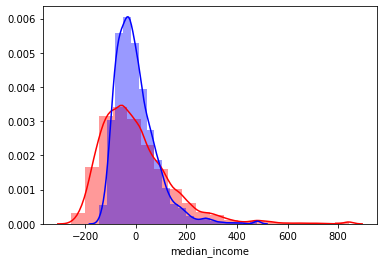

In [46]:
### BEGIN SOLUTION

#Condidering only numerical values
quantitative_df=housing[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"
                       ,"median_income","median_house_value"]]

#Normalization by Central limit theorem 
normalized_df=(quantitative_df-quantitative_df.mean())/(quantitative_df.std()/math.sqrt(quantitative_df.shape[0]))



#Condidering numerical values for test sample
quantitative_test_df=housing_test[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"
                       ,"median_income","median_house_value"]]
#Normalization of test sample
normalized_test_df=(quantitative_test_df-quantitative_test_df.mean())/(quantitative_test_df.std()/math.sqrt(quantitative_test_df.shape[0]))


sns.distplot(normalized_df['median_income'],bins=20,color='r')
sns.distplot(normalized_test_df['median_income'],bins=20,color='b')

### END SOLUTION

c. From the histograms you just plotted, you may reach two observations. First, the test data and the origial data have identical normilzed histograms. Second, the kernel density distribution of the median income is concentrated in the region of [1.5, 7] and has a long tail extending to infinity. 

If you want your machine learning algorithm works well across a wide range of median income, you may want to prepare the training and testing data such that each stratum of the median income has an adequate representation in the training and test datasets. The stratified sampling method serves this purpose.

Complete the following code to compare the performance of random sampling and and stratified sampling and save the results into a DataFrame as follows.
<img src="sampling_bias.jpg">

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf]
housing['income_level'] = pd.cut(housing.median_income, bins, labels=[1, 2, 3, 4, 5])
# note for this part some will come to certain errors, then please go to 
# https://github.com/ageron/handson-ml/issues/378
# to solve the issue
random_train_set, random_test_set = train_test_split(housing, test_size=0.33, random_state=25)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=25)
for train_index, test_index in split.split(housing, housing["income_level"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### BEGIN SOLUTION
    sampling_bias=pd.DataFrame({"overall":housing['income_level'].value_counts()/len(housing),
                            "random":random_test_set['income_level'].value_counts()/len(random_test_set),
                            "stratified":strat_test_set['income_level'].value_counts()/len(strat_test_set)
                           })

sampling_bias['rand.%error']=sampling_bias["random"]/sampling_bias["overall"]-1
sampling_bias['stratified.%error']=sampling_bias["stratified"]/sampling_bias["overall"]-1
### END SOLUTION

sampling_bias['error.reduction.ratio'] = sampling_bias['rand.%error']/sampling_bias['stratified.%error']
sampling_bias
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_level", axis=1, inplace=True)

,overall,random,stratified,rand.%error,stratified.%error,error.reduction.ratio
3,0.350581,0.347328,0.350558,-0.009279,-0.000067,138.101449
2,0.318847,0.323840,0.318849,0.015661,0.000007,2279.441558
4,0.176308,0.173517,0.176307,-0.015829,-0.000009,1721.000000
5,0.114438,0.114944,0.114504,0.004424,0.000575,7.689715
1,0.039826,0.040370,0.039783,0.013668,-0.001076,-12.705179


## 2. Combine Attributes (6 points)

Before you prepare data for Machine Learning algorithms, you may try various attribute combinations to see if a combined attributes have a stronger relationship with the target variable.

a. First, create three combined attributions: __rooms_per_household__, __bedrooms_per_room__, and __population_per_household__. Then compute the correlation coefficients between all numerical attributes and __median_house_value__. Output these coefficients in a decreasing order. e.g.:
```
median_house_value          1.000000
median_income               0.688075
```

In [48]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# YOUR CODE HERE
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
#taking numerical values for whole population
quantitative_df=housing[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"
                       ,"median_income","median_house_value","rooms_per_household","bedrooms_per_room","population_per_household"]]

In [49]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
### BEGIN SOLUTION
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
#taking numerical values for whole population
quantitative_df=housing[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households"
                       ,"median_income","median_house_value","rooms_per_household","bedrooms_per_room","population_per_household"]]
normalized_df=(quantitative_df-quantitative_df.mean())/(quantitative_df.std())
corr=normalized_df.corr(method ='pearson')
sorted_corr=corr['median_house_value'].sort_values(kind="quicksort",ascending=False)
sorted_corr
### END SOLUTION

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

b. Among the three combined attributes, which ones are clearly more correlated to __median_house_value__ than the original attributes? Which ones are not? Write your answer to a block string such as
```
answer = """
attribue a is more correlated.
attribue b is not.
"""
```

In [51]:
### BEGIN SOLUTION
answer="""
Attribute rooms_per_household is more correlated.
Attribute bedrooms_per_room is not correlated.

"""
### END SOLUTION
print(answer)


Attribute rooms_per_household is more correlated.
Attribute bedrooms_per_room is not correlated.




## 3. Missing Values (10 points)

There are three options to handle attributes with missing values:

1. Remove the rows that contain missing features.
2. Remove the columns that contain missing fetaures.
3. Replace the missing values with new values such as the mean, the median, etc.

a. Which DataFrame methods can be used to accomplish the above goals? Write your answer to a block string such as
```
answer = """
1. method_a()
2. method_b()
3. method_c()
"""
```

In [52]:
### BEGIN SOLUTION
answer="""
method_c() : Replace the missing values with new values such as the mean, the median, etc.
"""
### END SOLUTION
print(answer)


method_c() : Replace the missing values with new values such as the mean, the median, etc.



b. Assume you choose the third option, you may want a systematic solution that handle the following two scenarios:

1. Both the train data and test data need to handle the missing values.
2. When your system is going online, attributes that currently do not contain missing values may have missing values.

You can use the SimputeImputer class in the scikit-leran library (https://scikit-learn.org/stable/modules/impute.html) to accomplish the goal of the third option. Complete the following code to replace all missing values in each column with the means of that column and save the cleaned data as a feature matrix __X__. 

Hint: you may drop the non-numerical attribute in this step.

In [57]:
# YOUR CODE HERE


housing.head()
#Using fillna function of dataframe
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)
housing['bedrooms_per_room'].fillna(housing['bedrooms_per_room'].mean(), inplace=True)
X=housing.to_numpy()
housing_num = pd.DataFrame(X, columns=housing.columns)
X.shape


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


(20640, 12)

In [58]:
assert type(X).__name__ == "ndarray"

In [59]:
assert X.shape[0] == housing.shape[0]

In [60]:
assert np.isnan(X).any() == False

## 4. Handling Text and Categorical Attributes (10 points)

Categorical data is one type of structured data we frequently see in data science. For example, the position of a football player, the weather of a day, the size of a shirt, the genres of musics and country name are all categorical data.

In categorical data, the values of a data attribute are discrete and belong to a finite set of categories or classes, which are often known as classes or labels. The values of a categorical data can be numberic or textual.

There are two major classes of categorical data: nominal and ordinal. 

+ For nominal categorical attribute, there is no concept of ordering among the values of the attribute. For example, The types of weathers are normial data.

+ For ordinal categorical attribute, you can place the attributes into some kind of order or scale. For example, you can rate the happiness on a scale of 1-10. Similarly, shoe sizes, education level, income levels, and hurricane categories are examples of ordinal data.

a. Is __ocean_proximity__ a nominal categorical data or ordinal categorical data?

In [61]:
### BEGIN SOLUTION
answer = """ocean_proximity is ordinal categorical data"""
### END SOLUTION
answer

'ocean_proximity is ordinal categorical data'

b. Complete the following code to convert the __ocean_proximity__ categorical data into one-hot vectors (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Save the encoded results to a variable named __housing_cat_1hot__.

In [62]:
### BEGIN SOLUTION
from sklearn.preprocessing import OneHotEncoder

housing = pd.read_csv("housing.csv")
housing_objects=housing.select_dtypes(include=[object])
cat_encoder = OneHotEncoder(handle_unknown='ignore')
#cat_encoder.fit(housing_objects)
housing_cat_1hot=cat_encoder.fit_transform(housing_objects)

### END SOLUTION
cat_encoder.categories_
housing_cat_1hot.shape

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

(20640, 5)

## 5. Feature Scaling (12 points)

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. For the housing data, you may have already notices that the attributes have much different scales. For example , the total number of of rooms range from 6 to 39,320, while the median income range from 0 to 15.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

+ Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.

+ Standardization is different: first, it subtracts the mean value (so standardized values always have a zero mean); then it divides the difference by the standard deviation so that the resulting distribution has unit variance.

a. Is scaling the target values generally required? Justify your answer.

Yes scaling is required, because to preprocess the data we need to first normalize the data. Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.Normalization helps to provide correct estimation and speeds up the algorithm.

b. Which feature scaling method is preffered when the original data contain a small number of outliers? Justify your answer.

Standard scalar is better than min-max scalar as min-max scalar is more sensitive to outliers.In case of less number of outliers standard scalar serves as a better approach.Hence, Standars scalar method can ve preferred when the original data contain a small number of outliers.

c. Write some code to scale the housing data using standardization and save the transfromed data into a variable __housing_num_tr__.

In [63]:
### BEGIN SOLUTION
housing_num_tr=(quantitative_df-quantitative_df.mean())/(quantitative_df.std())

### END SOLUTION
df = pd.DataFrame(housing_num_tr)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.043300e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.043300e+04,2.064000e+04
mean,-1.429215e-12,-7.636681e-14,1.817399e-15,-9.590802e-17,-1.991805e-16,-2.836528e-16,7.563865e-17,-2.523810e-14,3.767873e-16,4.300802e-15,1.940541e-14,-7.201170e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.385935e+00,-1.447533e+00,-2.196127e+00,-1.207254e+00,-1.274062e+00,-1.256092e+00,-1.303952e+00,-1.774256e+00,-1.662601e+00,-1.852274e+00,-1.949528e+00,-2.289944e-01
25%,-1.113182e+00,-7.967694e-01,-8.453727e-01,-5.445566e-01,-5.739894e-01,-5.637952e-01,-5.742155e-01,-6.881019e-01,-7.561450e-01,-3.994399e-01,-6.486670e-01,-6.170912e-02
50%,5.389006e-01,-6.422715e-01,2.864502e-02,-2.332048e-01,-2.441248e-01,-2.291262e-01,-2.368104e-01,-1.767908e-01,-2.353280e-01,-8.078293e-02,-1.703336e-01,-2.431526e-02
75%,7.784775e-01,9.729330e-01,6.642943e-01,2.347971e-01,2.589780e-01,2.644885e-01,2.758360e-01,4.592952e-01,5.014851e-01,2.519554e-01,4.618943e-01,2.037404e-02
max,2.625216e+00,2.957996e+00,1.856137e+00,1.681517e+01,1.401836e+01,3.024960e+01,1.460117e+01,5.858144e+00,2.540349e+00,5.516190e+01,1.357235e+01,1.194162e+02


## Transformation Pipelines (10 points)

As you can see, there are many data transformation steps that need to be executed in the right order. To automate this process, you can create a pipeline using the Pipeline class in the scikit-learn library. Complete the following code to create a fully prepared data.

In [64]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit

# 1. Get the data
housing = pd.read_csv("housing.csv")

# 2. Split data into train set and test set
bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf]
housing['income_level'] = pd.cut(housing.median_income, bins, labels=[1, 2, 3, 4, 5])
# note for this part some will come to certain errors, then please go to 
# https://github.com/ageron/handson-ml/issues/378
# to solve the issue
random_train_set, random_test_set = train_test_split(housing, test_size=0.33, random_state=56)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=56)
for train_index, test_index in split.split(housing, housing["income_level"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_level", axis=1, inplace=True)

# 3. Divide train data into fetaure matrix and labels and save them to variable housing and housing_labels
### BEGIN SOLUTION
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
### END SOLUTION

# 4. Create combined attributes
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# 5. create a numerical pipline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# 6. Create a full pipeline
### BEGIN SOLUTION
housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
### END SOLUTION

#7. Apply the pipeline to the train set and save the results to housing_prepared
### BEGIN SOLUTION
housing_prepared = full_pipeline.fit_transform(housing)
### END SOLUTION
housing_prepared.shape

(13828, 16)

In [65]:
df_train = pd.DataFrame(housing_prepared)
df_train.set_index(housing.index, inplace=True)
df_train["labels"] = housing_labels
df_train.to_csv("housing_train.csv", index=False)

df_train = pd.read_csv("housing_train.csv")
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,labels
0,1.221177,-1.338206,0.108704,-0.023151,0.274908,-0.300323,0.274120,-0.548471,-0.430742,-0.103751,0.613605,0.0,0.0,0.0,0.0,1.0,171700.0
1,0.132529,0.321500,1.222985,-0.278582,-0.550974,-0.583916,-0.432586,0.082032,0.232780,-0.061628,-0.999898,0.0,1.0,0.0,0.0,0.0,109000.0
2,0.746766,-0.851982,-0.607619,-0.670088,-0.616176,-0.781600,-0.623158,-0.292744,-0.347369,-0.074942,0.365385,1.0,0.0,0.0,0.0,0.0,237500.0


In [66]:
test_data = strat_test_set.drop("median_house_value", axis=1)
test_labels = strat_test_set["median_house_value"].copy()
test_data.shape
transformed_test_data = full_pipeline.fit_transform(test_data)
transformed_test_data.shape

df_test = pd.DataFrame(transformed_test_data)
df_test.set_index(strat_test_set.index, inplace=True)
df_test["label"] = test_labels
df_test.to_csv("housing_test.csv", index=False)

df_test = pd.read_csv("housing_test.csv")
df_test.head(3)

(6812, 9)

(6812, 16)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,1.081133,-0.718825,-0.764192,-0.734466,-0.761110,-0.699216,-0.689343,-0.774816,-0.530146,-0.376232,-0.043201,0.0,1.0,0.0,0.0,0.0,112500.0
1,1.210779,-1.357403,1.690681,-0.498984,-0.465692,-0.572127,-0.454240,-0.657075,-0.337051,-0.563437,0.101589,0.0,0.0,0.0,0.0,1.0,203200.0
2,0.597453,-0.798647,-0.764192,0.205227,0.883459,0.491019,0.608835,-0.619400,-0.600263,-0.154500,1.143806,1.0,0.0,0.0,0.0,0.0,212500.0
